In [226]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


In [227]:
books = pd.read_csv("./Resources/Books.csv")

In [228]:
books['Awards'] = books['Awards'].fillna(0)

In [229]:
max_awards = books['Awards'].max()
min_awards = books['Awards'].min()
range_of_awards = max_awards - min_awards

books['minmax_norm_awards'] = round(1 + 9*((books['Awards'] - min_awards)/range_of_awards) , 3)

mean_awards = books['Awards'].mean()

books['mean_norm_awards'] = round(1 + 9*((books['Awards'] - mean_awards)/range_of_awards) , 3)

In [230]:
books["Ratings"] = books["Rating Value"]
books.drop(['Rating Value'], axis=1)

,Unnamed: 0,Title,Author,Rating Count,Review Count,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link,minmax_norm_awards,mean_norm_awards,Ratings
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...,2.286,1.786,4.28
1,1,1984,George Orwell,3250211,72375,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984,1.643,1.144,4.19
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...,1.321,0.822,3.93
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...,10.000,9.501,4.48
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...,1.964,1.465,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",0.0,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...,1.000,0.501,3.87
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...,1.643,1.144,4.13
993,993,Riddley Walker,Russell Hoban,7075,819,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...,1.964,1.465,4.02
994,994,Play It As It Lays,Joan Didion,29879,2278,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",0.0,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...,1.000,0.501,3.88


In [231]:
sample_books = books.sample(n = 100)

In [232]:
sample_books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link,minmax_norm_awards,mean_norm_awards,Ratings
958,958,Thinner,Richard Bachman,178091,2658,3.73,320.0,1984.0,0,"['Horror', 'Fiction', 'Thriller']",0.0,4.383,3.757778,https://www.goodreads.com/book/show/10605.Thinner,1.000,0.501,3.73
978,978,Rain of Gold,Victor Villaseñor,6744,711,4.49,576.0,1991.0,0,"['Fiction', 'Historical', 'Historical Fiction']",0.0,8.973,8.858889,https://www.goodreads.com/book/show/14345.Rain...,1.000,0.501,4.49
129,129,Peter Pan,J.M. Barrie,288357,11753,4.04,176.0,1911.0,0,"['Classics', 'Fantasy', 'Fiction']",0.0,6.255,5.838889,https://www.goodreads.com/book/show/34268.Pete...,1.000,0.501,4.04
614,614,From the Mixed-Up Files of Mrs. Basil E. Frank...,E.L. Konigsburg,192704,7190,4.14,178.0,1967.0,0,"['Fiction', 'Childrens', 'Young Adult']",4.0,6.859,6.510000,https://www.goodreads.com/book/show/3980.From_...,2.286,1.786,4.14
989,989,The Last Enchantment,Mary Stewart,14426,421,4.17,513.0,1979.0,1,"['Fantasy', 'Fiction', 'Historical']",1.0,7.040,6.711111,https://www.goodreads.com/book/show/89723.The_...,1.321,0.822,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,558,Waiting for the Barbarians,J.M. Coetzee,25596,1856,3.94,152.0,1980.0,0,"['Fiction', 'Cultural', 'Africa']",4.0,5.651,5.167778,https://www.goodreads.com/book/show/72579.Alia...,2.286,1.786,3.94
329,329,A Canticle for Leibowitz,Walter M. Miller Jr.,95920,4845,3.97,334.0,1959.0,1,"['Science Fiction', 'Fiction', 'Apocalyptic']",2.0,5.832,5.368889,https://www.goodreads.com/book/show/164154.A_C...,1.643,1.144,3.97
871,871,Trout Fishing in America / The Pill vs. the Sp...,Richard Brautigan,9209,420,4.15,400.0,1967.0,0,"['Fiction', 'Poetry', 'Short Stories']",0.0,6.919,6.576667,https://www.goodreads.com/book/show/12568.Trou...,1.000,0.501,4.15
814,814,Emily of New Moon,L.M. Montgomery,43862,1894,4.08,339.0,1923.0,1,"['Classics', 'Fiction', 'Young Adult']",0.0,6.497,6.106667,https://www.goodreads.com/book/show/32979.The_...,1.000,0.501,4.08


In [233]:
minmax_ratings_list = sample_books["minmax_norm_ratings"].tolist()
minmax_ratings_list.sort()
print(minmax_ratings_list)

[2.9930000000000003, 4.02, 4.2010000000000005, 4.322, 4.383, 4.4430000000000005, 4.685, 4.745, 4.8660000000000005, 4.8660000000000005, 4.926, 4.987, 5.167999999999999, 5.167999999999999, 5.349, 5.53, 5.53, 5.651, 5.711, 5.711, 5.832000000000001, 5.832000000000001, 5.893, 5.893, 5.893, 5.893, 5.952999999999999, 5.952999999999999, 5.952999999999999, 5.952999999999999, 6.013, 6.013, 6.013, 6.013, 6.074, 6.074, 6.1339999999999995, 6.1339999999999995, 6.1339999999999995, 6.195, 6.255, 6.376, 6.376, 6.376, 6.436, 6.436, 6.497000000000001, 6.497000000000001, 6.497000000000001, 6.497000000000001, 6.557, 6.557, 6.617000000000001, 6.678, 6.7379999999999995, 6.7379999999999995, 6.7989999999999995, 6.859, 6.859, 6.859, 6.859, 6.859, 6.919, 6.98, 6.98, 6.98, 6.98, 7.04, 7.101, 7.221, 7.282, 7.282, 7.3420000000000005, 7.3420000000000005, 7.3420000000000005, 7.3420000000000005, 7.403, 7.403, 7.403, 7.462999999999999, 7.462999999999999, 7.523, 7.705, 7.765, 8.007, 8.128, 8.187999999999999, 8.248, 8.24

In [234]:
print(max(minmax_ratings_list))
print(min(minmax_ratings_list))

9.396
2.9930000000000003


In [235]:
mean_ratings_norm = sample_books["mean_norm_ratings"].tolist()
mean_ratings_norm.sort()
print(mean_ratings_norm)

[2.2144444444444438, 3.355555555555555, 3.556666666666666, 3.6911111111111112, 3.7577777777777777, 3.8255555555555554, 4.093333333333334, 4.161111111111111, 4.2955555555555565, 4.2955555555555565, 4.362222222222221, 4.4288888888888875, 4.63111111111111, 4.63111111111111, 4.832222222222222, 5.033333333333333, 5.033333333333333, 5.167777777777777, 5.234444444444444, 5.234444444444444, 5.368888888888888, 5.368888888888888, 5.4355555555555535, 5.4355555555555535, 5.4355555555555535, 5.4355555555555535, 5.503333333333333, 5.503333333333333, 5.503333333333333, 5.503333333333333, 5.5699999999999985, 5.5699999999999985, 5.5699999999999985, 5.5699999999999985, 5.637777777777778, 5.637777777777778, 5.704444444444443, 5.704444444444443, 5.704444444444443, 5.771111111111112, 5.838888888888889, 5.973333333333333, 5.973333333333333, 5.973333333333333, 6.04, 6.04, 6.1066666666666665, 6.1066666666666665, 6.1066666666666665, 6.1066666666666665, 6.1744444444444415, 6.1744444444444415, 6.2411111111111115

In [236]:
print(max(mean_ratings_norm))
print(min(mean_ratings_norm))

9.32888888888889
2.2144444444444438


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


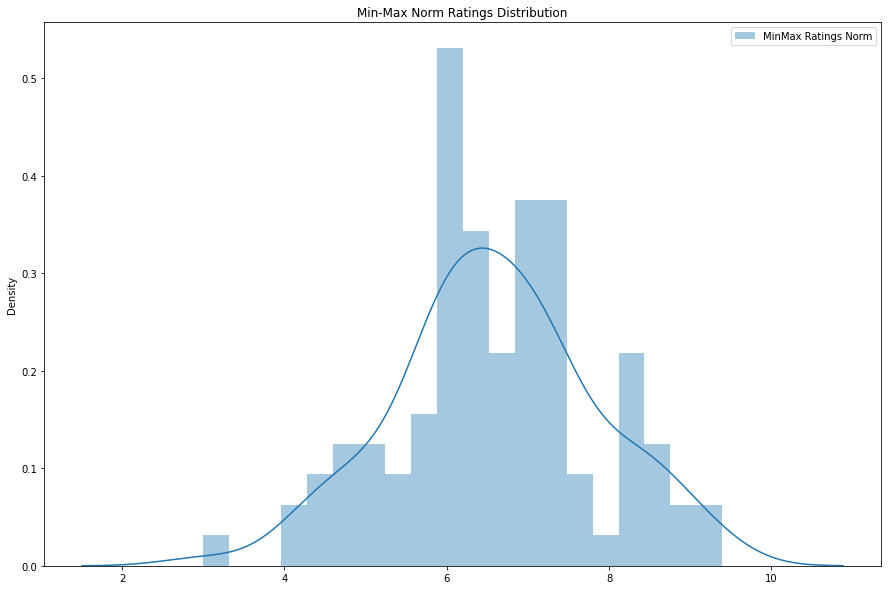

In [238]:
# Distribution plot of minmax normal distribution
plt.figure(figsize=(15,10))
sns.distplot(minmax_ratings_list, label='MinMax Ratings Norm', bins=20)
c=plt.legend()
plt.title("Min-Max Norm Ratings Distribution")
plt.savefig('minmax_ratings_norm.jpg')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


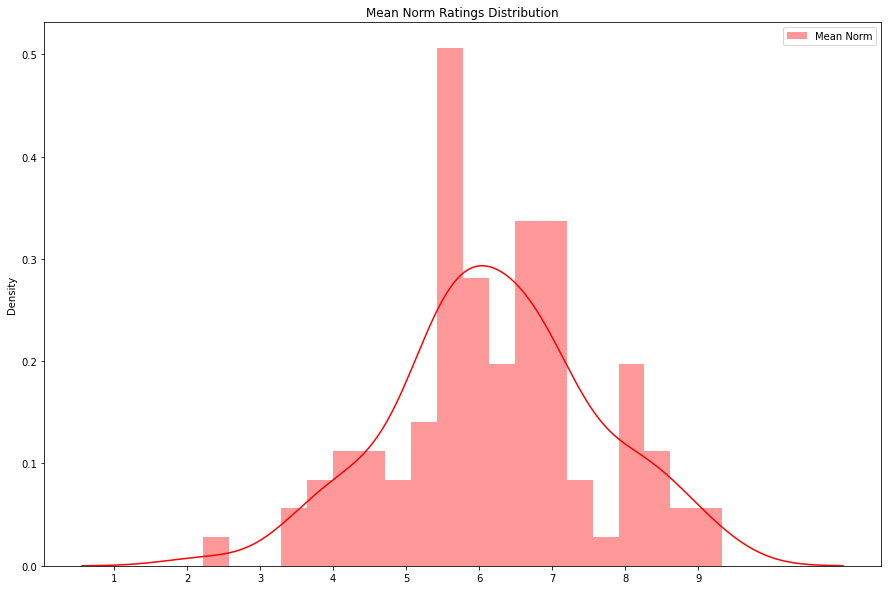

In [239]:
# Distribution plot of mean normal distribution
plt.figure(figsize=(15,10))
sns.distplot(mean_ratings_norm, label='Mean Norm', color='red', bins=20)
c=plt.legend()
plt.title("Mean Norm Ratings Distribution")
plt.xticks(range(1, 10))
plt.savefig('mean_ratings_norm.jpg')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


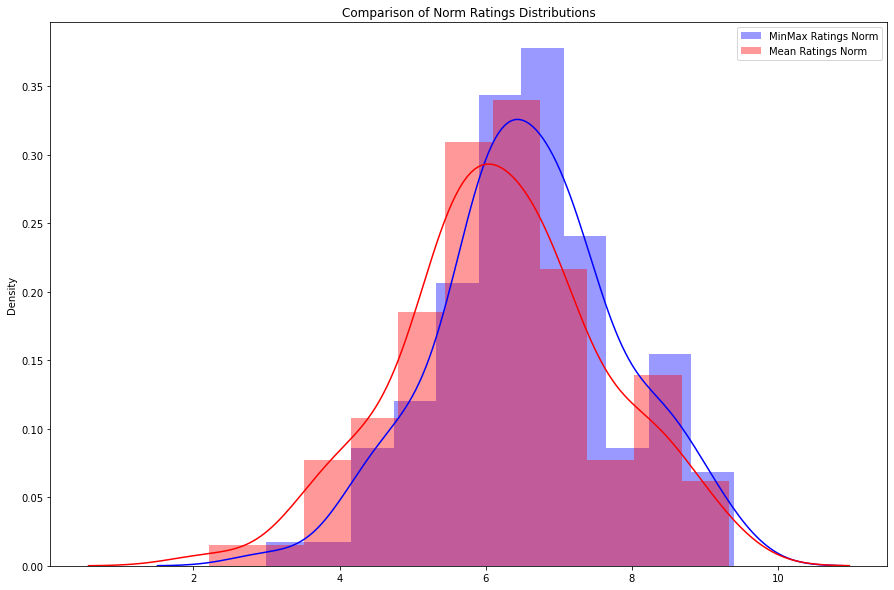

In [240]:
# Distribution plot of both normal distributions
plt.figure(figsize=(15,10))
sns.distplot(minmax_ratings_list, label='MinMax Ratings Norm', color='blue')
sns.distplot(mean_ratings_norm, label='Mean Ratings Norm', color='red')
c=plt.legend()
plt.title("Comparison of Norm Ratings Distributions")
plt.savefig('norm_ratings_dists.jpg')

In [241]:
minmax_awards_list = sample_books["minmax_norm_awards"].tolist()
minmax_awards_list.sort()
print(minmax_awards_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.964, 1.964, 1.964, 2.286, 2.286, 2.286, 2.286, 2.286, 2.286, 2.607, 2.929, 2.929, 2.929, 2.929, 2.929, 3.25, 3.25, 3.25, 3.893, 3.893]


In [242]:
print(max(minmax_awards_list))
print(min(minmax_awards_list))

3.893
1.0


In [243]:
mean_awards_norm = sample_books["mean_norm_awards"].tolist()
mean_awards_norm.sort()
print(mean_awards_norm)

[0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.465, 1.465, 1.465, 1.786, 1.786, 1.786, 1.786, 1.786, 1.786, 2.108, 2.429, 2.429, 2.429, 2.429, 2.429, 2.751, 2.751, 2.751, 3.394, 3.394]


In [244]:
print(max(mean_awards_norm))
print(min(mean_awards_norm))

3.394
0.501


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


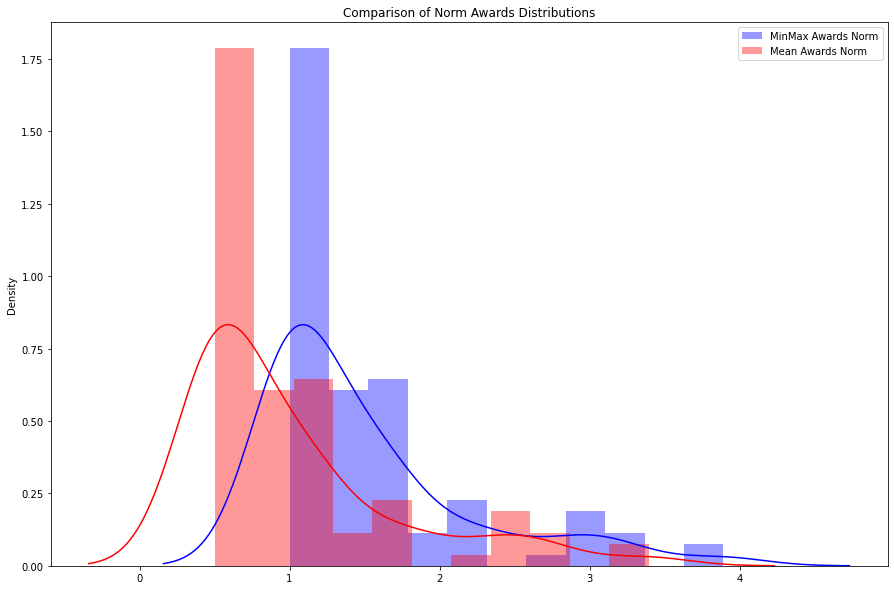

In [245]:
# Distribution plot of both normal distributions
plt.figure(figsize=(15,10))
sns.distplot(minmax_awards_list, label='MinMax Awards Norm', color='blue')
sns.distplot(mean_awards_norm, label='Mean Awards Norm', color='red')
c=plt.legend()
plt.title("Comparison of Norm Awards Distributions")
plt.savefig('norm_awards_dists.jpg')

In [ ]:
"""
- describe meaning of skews - what does it show? -
dramatically less books with lots of awards.
roughly equal books with much higher and lower ratings.
therefore it is much less common for a book to get an award
or many awards than it is to get a dramatically different level of review.

- boxplots?
- heatmaps to show correlation?
"""

In [ ]:
# PROBABILITY DENSITY FUNCTION

In [246]:
from __future__ import division

In [247]:
mean_awards = books.Awards.mean()
mean_awards

1.5532128514056225

In [248]:
mean_ratings = books.Ratings.mean()
mean_ratings

4.059738955823293

In [249]:
population_variance_awards = books.Awards.var(ddof=0)
sample_variance_awards = books.Awards.var() # ddof=1 by default in pandas

population_variance_awards, sample_variance_awards

(6.8837145771842385, 6.890632883291961)

In [250]:
population_variance_ratings = books.Ratings.var(ddof=0)
sample_variance_ratings = books.Ratings.var() # ddof=1 by default in pandas

population_variance_ratings, sample_variance_ratings

(0.04178667884388962, 0.04182867550604428)

In [251]:
population_std_awards = books.Awards.std(ddof=0)
sample_std_awards = books.Awards.std()

population_std_awards, sample_std_awards

(2.6236833988086747, 2.625001501578992)

In [252]:
population_std_ratings = books.Ratings.std(ddof=0)
sample_std_ratings = books.Ratings.std()

population_std_ratings, sample_std_ratings

(0.20441790245448077, 0.20452059922180035)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


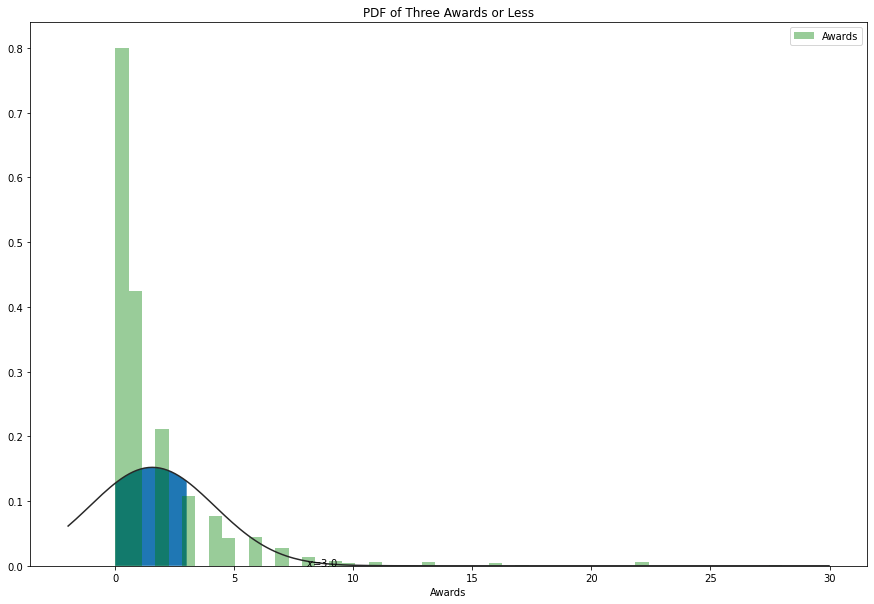

In [253]:
# First take a look at the pdf and especially the green area under
# the curve containing the probability of 3 awards or less.
plt.figure(figsize=(15,10))
x_awards = 3.0
sns.distplot(books["Awards"], label='Awards', kde=False, 
             fit=stats.norm, color='green')
plt.text(x_awards+5, .0003, '$x$='+str(x))

xplot_awards = np.linspace(min(books["Awards"]), x_awards, 10)
yplot_awards = stats.norm.pdf(xplot_awards, mean_awards, population_std_awards)
plt.fill_between(xplot_awards,  yplot_awards)
c=plt.legend()
plt.title("PDF of Three Awards or Less")
plt.savefig('PDF_Awards.jpg')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


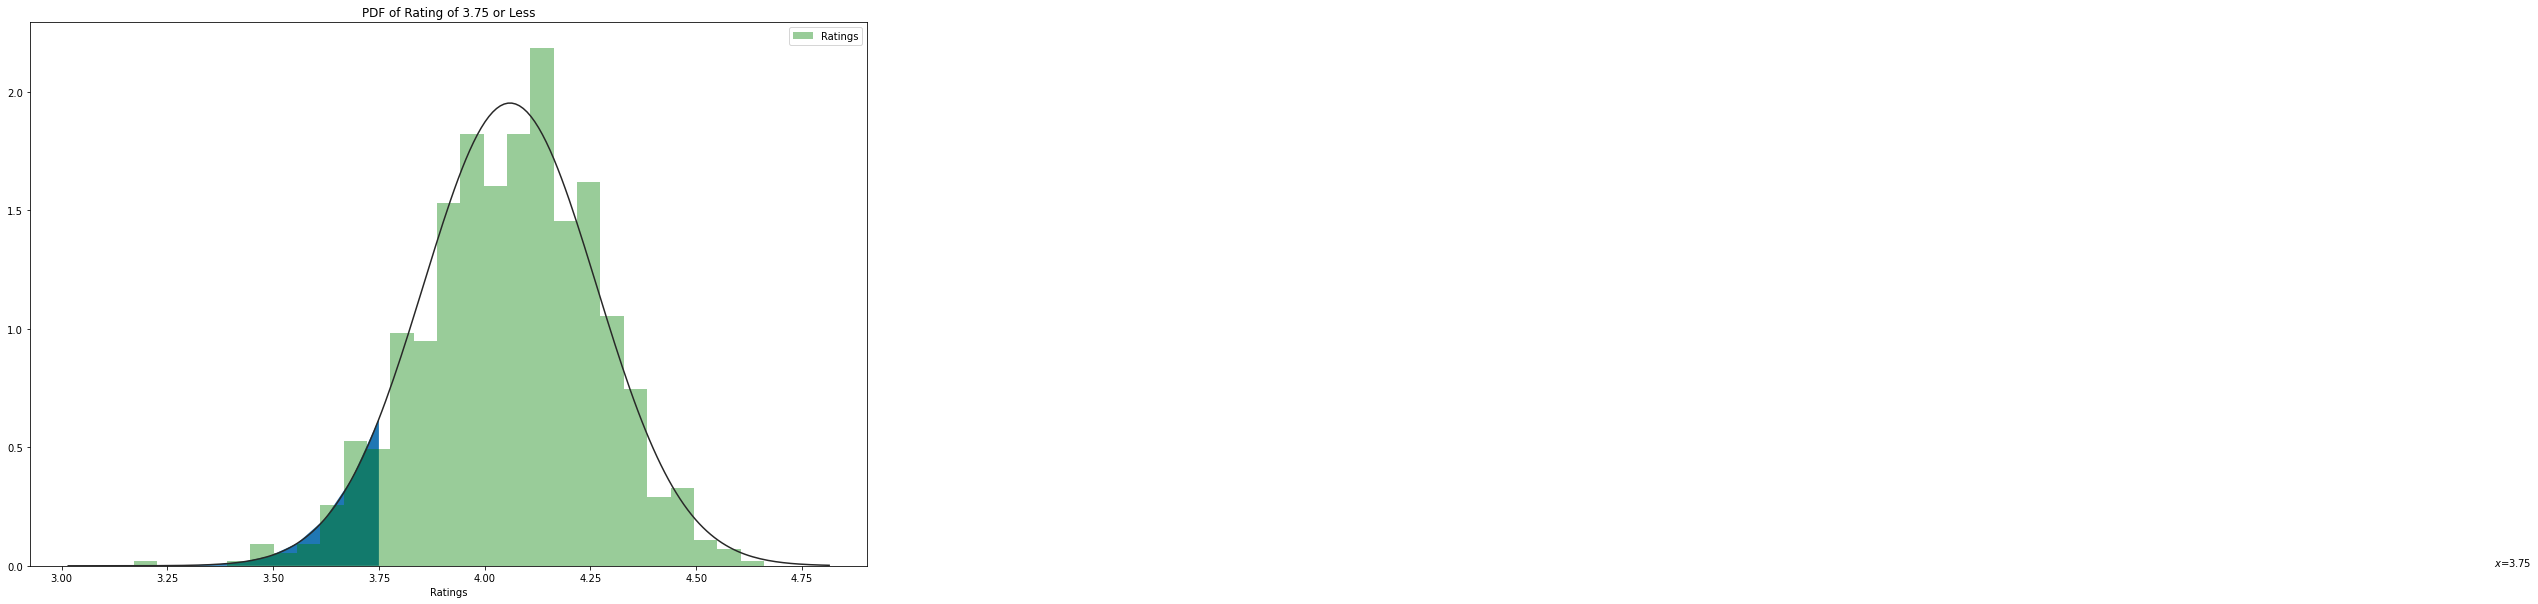

In [254]:
# First take a look at the pdf and especially the green area under
# the curve containing the probability of ratings of 3 or less.
plt.figure(figsize=(15,10))
x_ratings = 3.75
sns.distplot(books["Ratings"], label='Ratings', kde=False, 
             fit=stats.norm, color='green')
plt.text(x_ratings+5, .0003, '$x$='+str(x_ratings))

xplot_ratings = np.linspace(min(books["Ratings"]), x_ratings,10)
yplot_ratings = stats.norm.pdf(xplot_ratings, mean_ratings, population_std_ratings)
plt.fill_between(xplot_ratings,  yplot_ratings)
c=plt.legend()
plt.title("PDF of Rating of 3.75 or Less")
plt.savefig('PDF_Ratings.jpg')

In [255]:
# To calculate the probability, we need the z score.
zscore_awards = (x_awards - mean_awards) / population_std_awards
zscore_awards

0.5514335873190013

In [256]:
# To calculate the probability, we need the z score.
zscore_ratings = (x_ratings - mean_ratings) / population_std_ratings
zscore_ratings

-1.5152242152189417

In [257]:
# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p_awards = stats.norm.cdf(zscore_awards)
p_awards


0.7093317592335449

In [258]:
# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p_ratings = stats.norm.cdf(zscore_ratings)
p_ratings

0.06485781635782467

In [ ]:
# From probability back to the actual value

In [ ]:
# Let's assume we have a 22% chance of a book having a certain number of awards or more.
# What is the minimum number of awards we have in this case?

In [259]:
# We use the ppf function (inverse cdf) - from probability to z score
p_awards_new = 1 - 0.22
z_awards_new = stats.norm.ppf(p_awards_new)
z_awards_new


0.7721932141886848

In [260]:
# From z score to number of awards
x_awards_new = z_awards_new * population_std_awards + mean_awards
x_awards_new

3.579203368145186

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


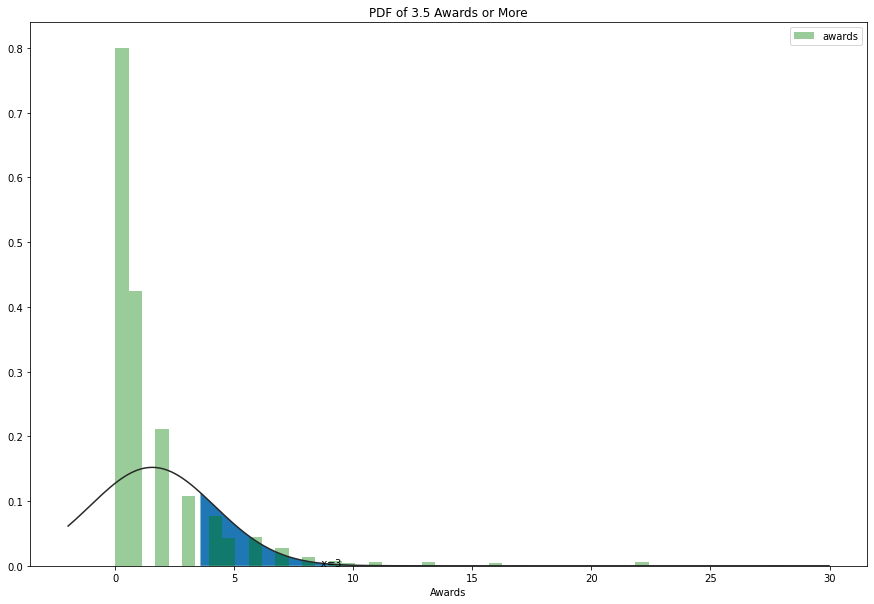

In [263]:
# The green area under the curve containing the probability 
# of (roughly) 3.5 awards or more.
plt.figure(figsize=(15,10))
sns.distplot(books["Awards"], label='awards', kde=False, 
             fit=stats.norm, color='green')
plt.text(x_awards_new+5, .0003, '$x$='+str(int(x)))

xplot_awards_new = np.linspace(x_awards_new, max(books["Awards"]), 50)
yplot_awards_new = stats.norm.pdf(xplot_awards_new, mean_awards, population_std_awards)
plt.fill_between(xplot_awards_new,  yplot_awards_new)
c=plt.legend()
plt.title("PDF of 3.5 Awards or More")
plt.savefig('PDF_Awards2.jpg')

In [ ]:
# Let's assume we have a 40% chance of a book having a certain rating or more.
# What is the minimum rating we have in this case?

In [264]:
# We use the ppf function (inverse cdf) - from probability to z score
p_ratings_new = 1 - 0.22
z_ratings_new = stats.norm.ppf(p_ratings_new)
z_ratings_new

0.7721932141886848

In [265]:
# From z score to number of awards
x_ratings_new = z_ratings_new * population_std_ratings + mean_ratings
x_ratings_new

4.2175890729573275

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


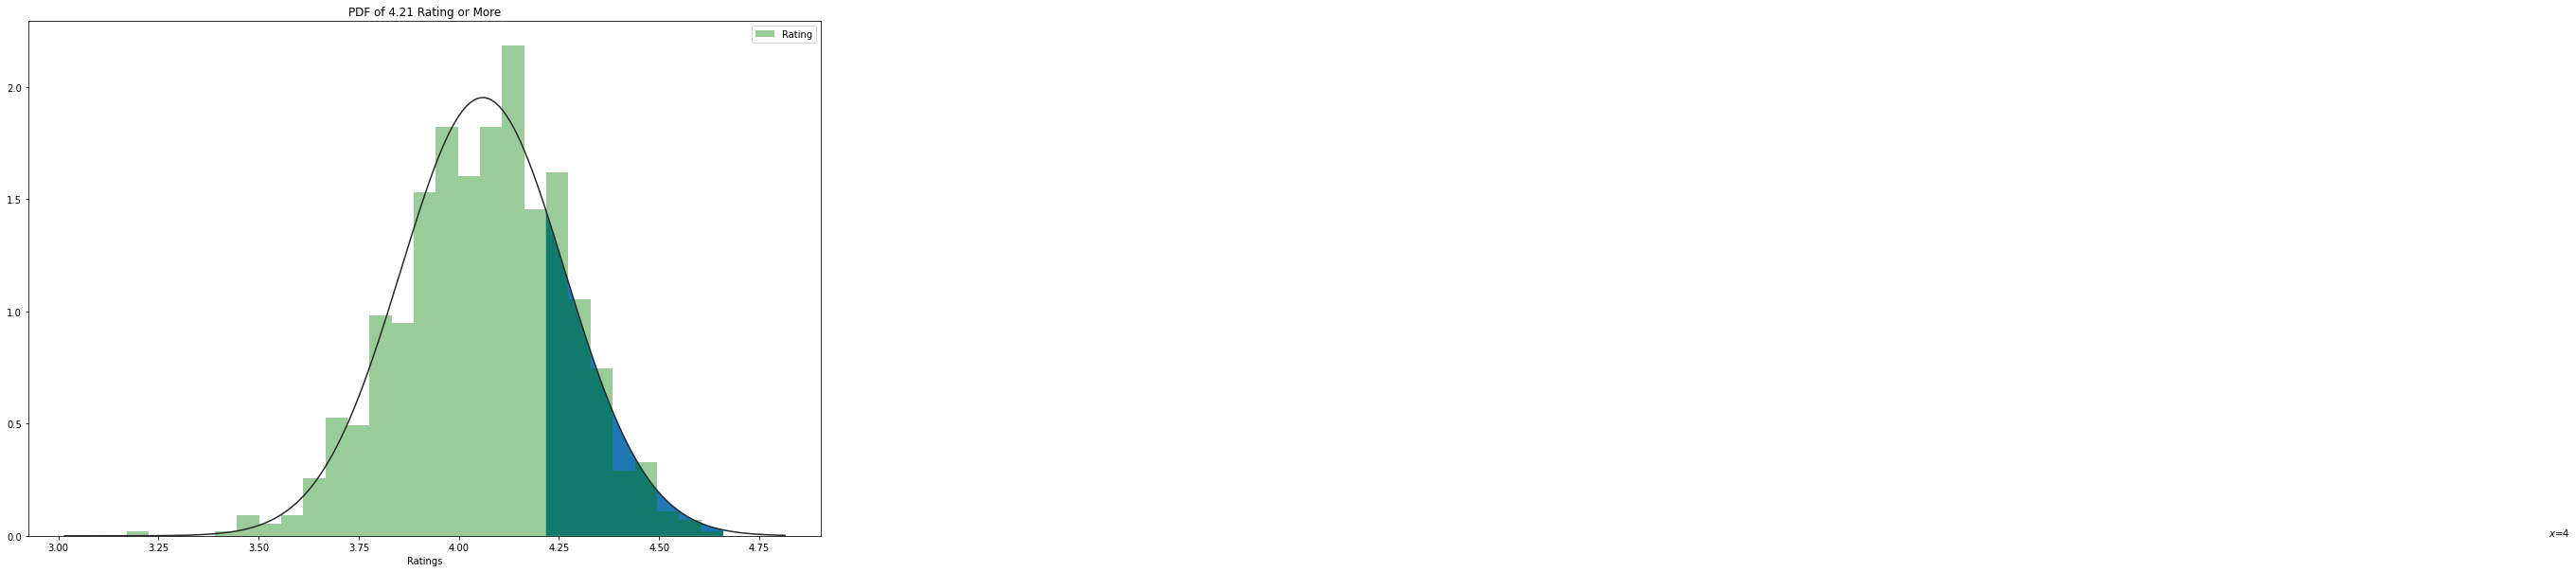

In [267]:
# The green area under the curve containing the probability 
# of (roughly) a rating of 4.21 or more.
plt.figure(figsize=(15,10))
sns.distplot(books["Ratings"], label='Rating', kde=False, 
             fit=stats.norm, color='green')
plt.text(x_ratings_new+5, .0003, '$x$='+str(int(x_ratings_new)))

xplot_ratings_new = np.linspace(x_ratings_new, max(books["Ratings"]), 50)
yplot_ratings_new = stats.norm.pdf(xplot_ratings_new, mean_ratings, population_std_ratings)
plt.fill_between(xplot_ratings_new,  yplot_ratings_new)
c=plt.legend()
plt.title("PDF of 4.21 Rating or More")
plt.savefig('PDF_Rating2.jpg')

In [ ]:
# NORMAL DISTRIBUTION

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


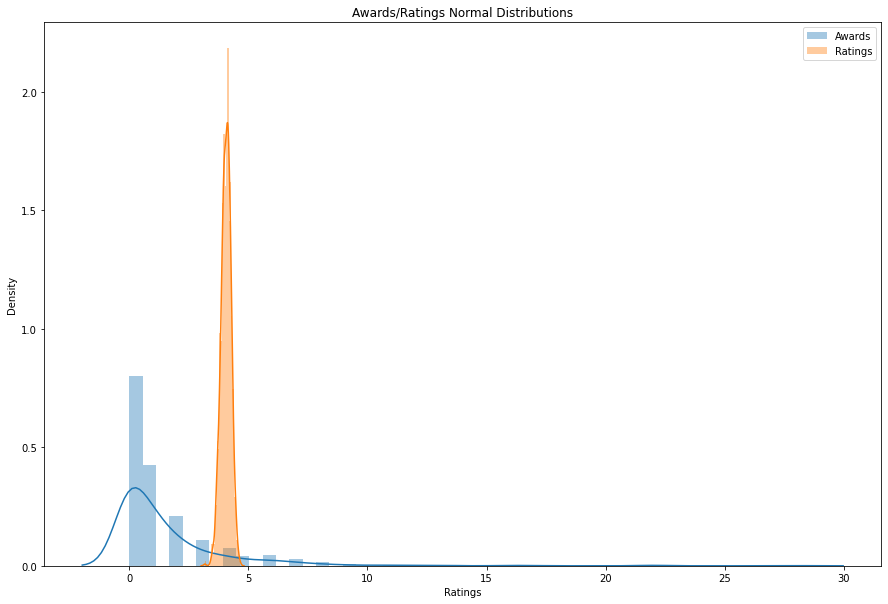

In [270]:
# Distribution plot of both normal distributions
plt.figure(figsize=(15,10))
sns.distplot(books["Awards"], label='Awards')
sns.distplot(books["Ratings"], label='Ratings')
c=plt.legend()
plt.title("Awards/Ratings Normal Distributions")
plt.savefig('Awards_Ratings_Norms.jpg')

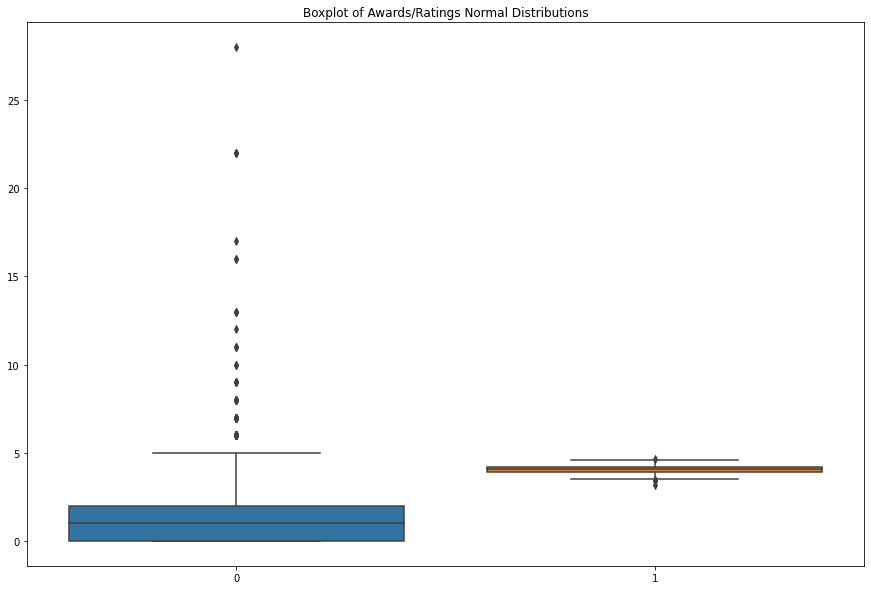

In [271]:
# Boxplot of the distributions
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=[books["Awards"],books["Ratings"]])
plt.title("Boxplot of Awards/Ratings Normal Distributions")
plt.savefig('Boxplot_Awards_Ratings_Norm.jpg')

In [ ]:
# The Standard Normal Distribution

In [272]:
# Calculate the z-scores for Awards array
zscores_awards_array = stats.mstats.zscore(books["Awards"])
zscores_awards_array[:10]

array([ 0.93257714,  0.17029004, -0.21085351, 10.08002229,  0.55143359,
        0.17029004, -0.21085351, -0.21085351,  0.93257714,  0.17029004])

In [273]:
# Calculate the z-scores for Ratings
zscores_ratings_array = stats.mstats.zscore(books["Ratings"])
zscores_ratings_array[:10]

array([ 1.07750369,  0.63722914, -0.63467512,  2.05589158,  1.07750369,
       -0.53683633,  0.49047096,  1.22426187, -0.34115875, -1.22170785])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


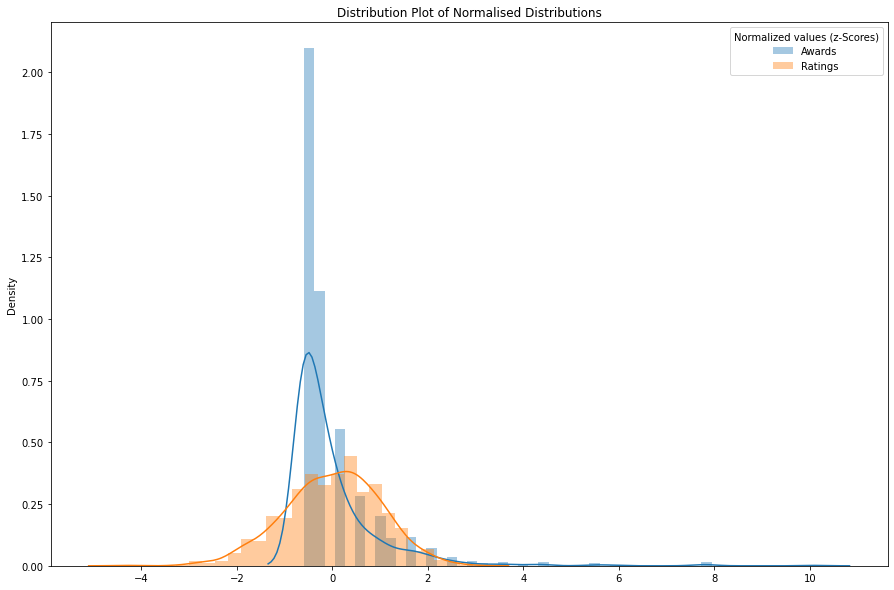

In [274]:
# Distribution plot of the normalized distributions
plt.figure(figsize=(15,10))
sns.distplot(zscores_awards_array, label='Awards')
sns.distplot(zscores_ratings_array, label='Ratings')
c=plt.legend(title='Normalized values (z-Scores)')
plt.title("Distribution Plot of Normalised Distributions")
plt.savefig('Dist_Plot_Norm.jpg')


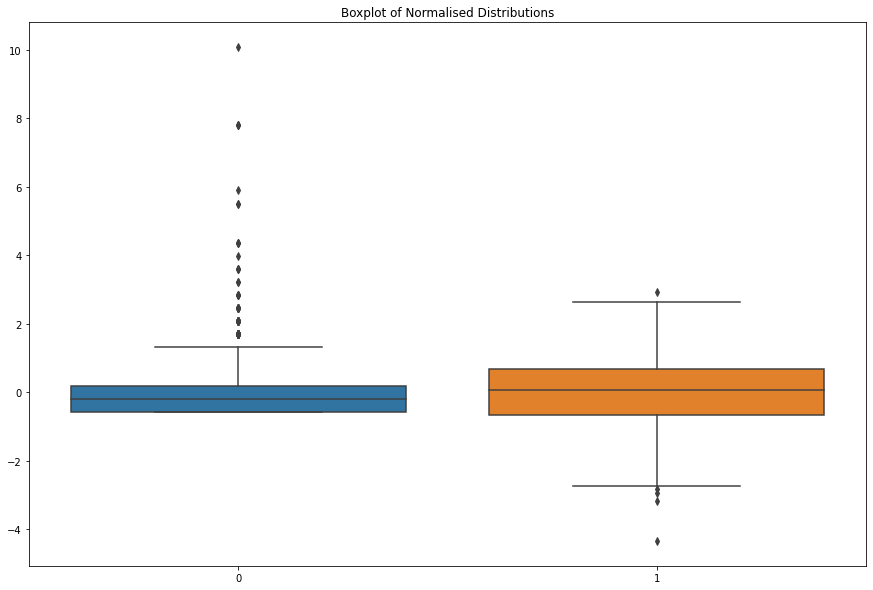

In [275]:
# Boxplot of the normalized distributions
plt.figure(figsize=(15,10))
c=sns.boxplot(data=[zscores_awards_array, zscores_ratings_array])
plt.title("Boxplot of Normalised Distributions")
plt.savefig('Boxplot_Norm_Dists.jpg')

In [ ]:
# Mapping to other distributions
"""
Now we have our normalized distributions, we can do some mapping from one to the other.
Let's say I wanted to know roughly the equivalent Rating score
given an amount of Awards.
I can calculate this by using the Standard Normal Distribution (z scores).
"""


In [276]:
# First calculate the z score for my chosen amount of Awards

# 𝑧=(𝑥−𝜇)/𝜎

me_awards = 4.0
me_awards_zscore = (me_awards - mean_awards) / population_std_awards
me_awards_zscore

0.9325771355283873

In [277]:
# Than map the z score to a Ratings equivalent

# 𝑥=𝑧⋅𝜎+𝜇

me_equiv_ratings = (me_awards_zscore * population_std_ratings) + mean_ratings
me_equiv_ratings

4.250374417745014

In [ ]:
# BAYES THEOREM

"""
What is the probability that a book that is part of a series has won an award?

p(award|series) = [p(series|award)*p(award)] / p(series)  --> Bayes Theorem

p(series|award) = prob_series_awards
p(award) = prob_award
p(series) = prob_series

"""

"\nWhat is the probability that a book that is part of a series has won an award?\n\np(award|series) = [p(series|award)*p(award)] / p(series)  --> Bayes Theorem\n\np(series|award) = ** don't know yet **\np(award) = prob_award\np(series) = prob_series\n\n"

In [ ]:
# aggregate all the books that are in a series and count them
books["series"] = books.series.replace({0: "No", 1: "Yes"})  
series = books.groupby(['series']).count()
series = series.rename(columns = {"Unnamed: 0":"Series Sum"})
series["Series Sum"]

series
No     645
Yes    351
Name: Series Sum, dtype: int64

In [ ]:
# find proprotion of books with series
print("Proportion of books with a series:")
prob_series = 351 / (351+645)
print(prob_series)

Proportion of books with a series:
0.35240963855421686


In [278]:
# aggregate all the books that won an award and count them

books['Awards'].values[books['Awards'].values > 0] = 1
books["Awards"] = books.Awards.replace({0.0: "No", 1.0: "Yes"})  
awards = books.groupby(['Awards']).count()
awards = awards.rename(columns = {"Unnamed: 0":"Awards Sum"})
awards["Awards Sum"]

Awards
No     446
Yes    550
Name: Awards Sum, dtype: int64

In [279]:
# find proprotion of books with awards
print("Proportion of books with one or more awards:")
prob_award = 550 / (550+446)
print(prob_award)

Proportion of books with one or more awards:
0.5522088353413654


In [280]:
books["Awards"] = books.Awards.replace({0.0: "No", 1.0: "Yes"}) 
books["series"] = books.series.replace({0.0: "No", 1.0: "Yes"}) 

In [281]:
"""
To find p(series|award):
Summarize the data by calculating the number of books which have awards or not,
(Yes or No)
and giving the number of those groups which also have series:

"""

series_award = books.groupby("Awards")["series"].agg([lambda z: np.sum(z=="Yes"), "size"])
series_award.columns = ["Also With Series", "With Awards?"]
series_award

,Also With Series,With Awards?
Awards,,
No,137,446
Yes,214,550


In [282]:
"""
What is the probability that a book that is part of a series has won an award?

p(award|series) = [p(series|award)*p(award)] / p(series)  --> Bayes Theorem

"""
prob_series_award = 214/500
print("p(series|award) = ", prob_series_award)

prob_award = 550 / (550+446)
print("p(award) = ", prob_award)

prob_series = 351 / (351+645)
print("p(series) = ", prob_series)

prob_award_series = (prob_series_award * prob_award) / prob_series
print("\nTherefore,\np(award|series) = ", prob_award_series)

p(series|award) =  0.428
p(award) =  0.5522088353413654
p(series) =  0.35240963855421686

Therefore,
p(award|series) =  0.6706552706552706
